## 서울교통공사_지하철혼잡도정보
서울교통공사 1-8호선 30분 단위 평균 혼잡도로 30분간 지나는 열차들의 평균 혼잡도(정원대비 승차인원으로, 승차인과 좌석수가 일치할 경우를 혼잡도 34%로 산정)를 나타낸다.(단위: %). 서울교통공사 혼잡도 데이터는 조사일자(평일, 토요일, 일요일), 호선, 역번호, 역명, 상하선구분, 30분단위 별 혼잡도 데이터로 구성되어 있다. (2년 단위 업데이트 자료)

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('./서울교통공사_지하철혼잡도정보_20211231.csv', encoding='cp949') # 데이터 출처 www.data.go.kr
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      1704 non-null   int64  
 1   조사일자    1704 non-null   object 
 2   호선      1704 non-null   int64  
 3   역번호     1704 non-null   int64  
 4   역명      1704 non-null   object 
 5   구분      1704 non-null   object 
 6   5시30분   1704 non-null   float64
 7   6시00분   1704 non-null   float64
 8   6시30분   1704 non-null   float64
 9   7시00분   1704 non-null   float64
 10  7시30분   1704 non-null   float64
 11  8시00분   1704 non-null   float64
 12  8시30분   1704 non-null   float64
 13  9시00분   1704 non-null   float64
 14  9시30분   1704 non-null   float64
 15  10시00분  1704 non-null   float64
 16  10시30분  1704 non-null   float64
 17  11시00분  1704 non-null   float64
 18  11시30분  1704 non-null   float64
 19  12시00분  1704 non-null   float64
 20  12시30분  1704 non-null   float64
 21  13시00분  1704 non-null   float64
 22  

In [2]:
df.head(4)

,연번,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
0,1,평일,1,150,서울역,상선,6.2,14.6,13.4,26.8,...,20.0,15.1,11.1,12.0,12.5,10.1,10.4,16.4,7.8,6.1
1,2,평일,1,150,서울역,하선,9.1,8.6,9.3,15.2,...,37.5,26.5,25.5,26.4,26.3,21.1,32.1,20.3,12.6,10.3
2,3,평일,1,151,시청,상선,5.4,10.1,13.0,20.8,...,24.1,17.4,13.7,14.5,15.8,12.1,14.5,18.3,11.7,11.7
3,4,평일,1,151,시청,하선,7.0,6.8,10.2,14.5,...,33.8,22.9,22.0,24.1,23.0,21.0,24.8,18.5,11.8,9.1


In [3]:
df.tail(4)

,연번,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
1700,1701,일요일,8,2826,수진,상선,2.4,1.5,3.2,2.2,...,4.6,4.1,3.4,4.4,4.2,4.1,3.9,3.8,2.6,1.4
1701,1702,일요일,8,2826,수진,하선,9.3,4.1,2.6,2.1,...,2.6,1.9,2.3,1.5,1.8,1.3,1.3,0.9,1.1,0.5
1702,1703,일요일,8,2827,모란,상선,1.6,0.9,2.5,1.3,...,4.7,4.2,3.7,4.8,4.1,4.0,4.0,4.2,2.7,1.8
1703,1704,일요일,8,2827,모란,하선,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.set_index('연번', inplace=True)
print(df.head())

   조사일자  호선  역번호   역명  구분  5시30분  6시00분  6시30분  7시00분  7시30분  ...  19시00분  \
연번                                                            ...           
1    평일   1  150  서울역  상선    6.2   14.6   13.4   26.8   43.3  ...    20.0   
2    평일   1  150  서울역  하선    9.1    8.6    9.3   15.2   29.3  ...    37.5   
3    평일   1  151   시청  상선    5.4   10.1   13.0   20.8   32.0  ...    24.1   
4    평일   1  151   시청  하선    7.0    6.8   10.2   14.5   27.0  ...    33.8   
5    평일   1  152   종각  상선    5.2   10.8    9.3   13.6   19.6  ...    28.8   

    19시30분  20시00분  20시30분  21시00분  21시30분  22시00분  22시30분  23시00분  23시30분  
연번                                                                          
1     15.1    11.1    12.0    12.5    10.1    10.4    16.4     7.8     6.1  
2     26.5    25.5    26.4    26.3    21.1    32.1    20.3    12.6    10.3  
3     17.4    13.7    14.5    15.8    12.1    14.5    18.3    11.7    11.7  
4     22.9    22.0    24.1    23.0    21.0    24.8    18.5    11.8     9.1 

In [5]:
print(df.shape)

(1704, 42)


In [6]:
df.columns

Index(['조사일자', '호선', '역번호', '역명', '구분', '5시30분', '6시00분', '6시30분', '7시00분',
       '7시30분', '8시00분', '8시30분', '9시00분', '9시30분', '10시00분', '10시30분',
       '11시00분', '11시30분', '12시00분', '12시30분', '13시00분', '13시30분', '14시00분',
       '14시30분', '15시00분', '15시30분', '16시00분', '16시30분', '17시00분', '17시30분',
       '18시00분', '18시30분', '19시00분', '19시30분', '20시00분', '20시30분', '21시00분',
       '21시30분', '22시00분', '22시30분', '23시00분', '23시30분'],
      dtype='object')

### 주제1 집에서 학교를 가는데 어느 시간 때 가는 것이 좋을까?
학교를 가는 지하철을 탈 때 어느 시간 때에 타야지 편하게 갈지 궁금해서 분석해보려고한다.
집(신도림) -> 학교(신촌) 이므로 이 사이 역들을 조사를 해보자.
참고로 신도림 -> 신촌은 내선순환(하행)이다.

In [7]:
station = ['신도림', '문래', '영등포구청', '당산', '합정', '홍대입구', '신촌']
df[(df['역명'].isin(station)) & (df['구분']=='내선')&(df['조사일자']=='평일')] #리스트 안에 있는 것을 찾을때는 .isin(리스트)를 쓴다.

,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
연번,,,,,,,,,,,,,,,,,,,,,
87,평일,2,234,신도림,내선,22.5,25.8,28.2,45.6,66.2,...,36.5,21.8,20.6,16.3,18.4,19.2,26.4,27.1,12.9,17.1
89,평일,2,235,문래,내선,22.3,25.1,28.0,44.5,58.9,...,38.5,26.1,20.4,22.2,24.0,23.0,40.5,29.9,32.2,23.8
91,평일,2,236,영등포구청,내선,23.0,24.9,25.4,44.9,57.4,...,35.6,24.2,18.8,20.3,21.6,22.1,37.7,25.2,29.3,20.8
93,평일,2,237,당산,내선,21.6,23.1,24.6,43.8,56.5,...,35.9,24.7,17.8,19.7,20.8,21.9,36.6,23.6,28.2,17.9
95,평일,2,238,합정,내선,19.1,20.8,24.7,39.6,48.8,...,24.9,16.7,12.2,12.3,17.2,14.8,28.5,18.4,21.1,12.1
97,평일,2,239,홍대입구,내선,16.2,17.4,27.5,41.3,52.9,...,22.3,14.6,11.8,12.6,19.9,18.2,31.8,27.4,30.8,12.9


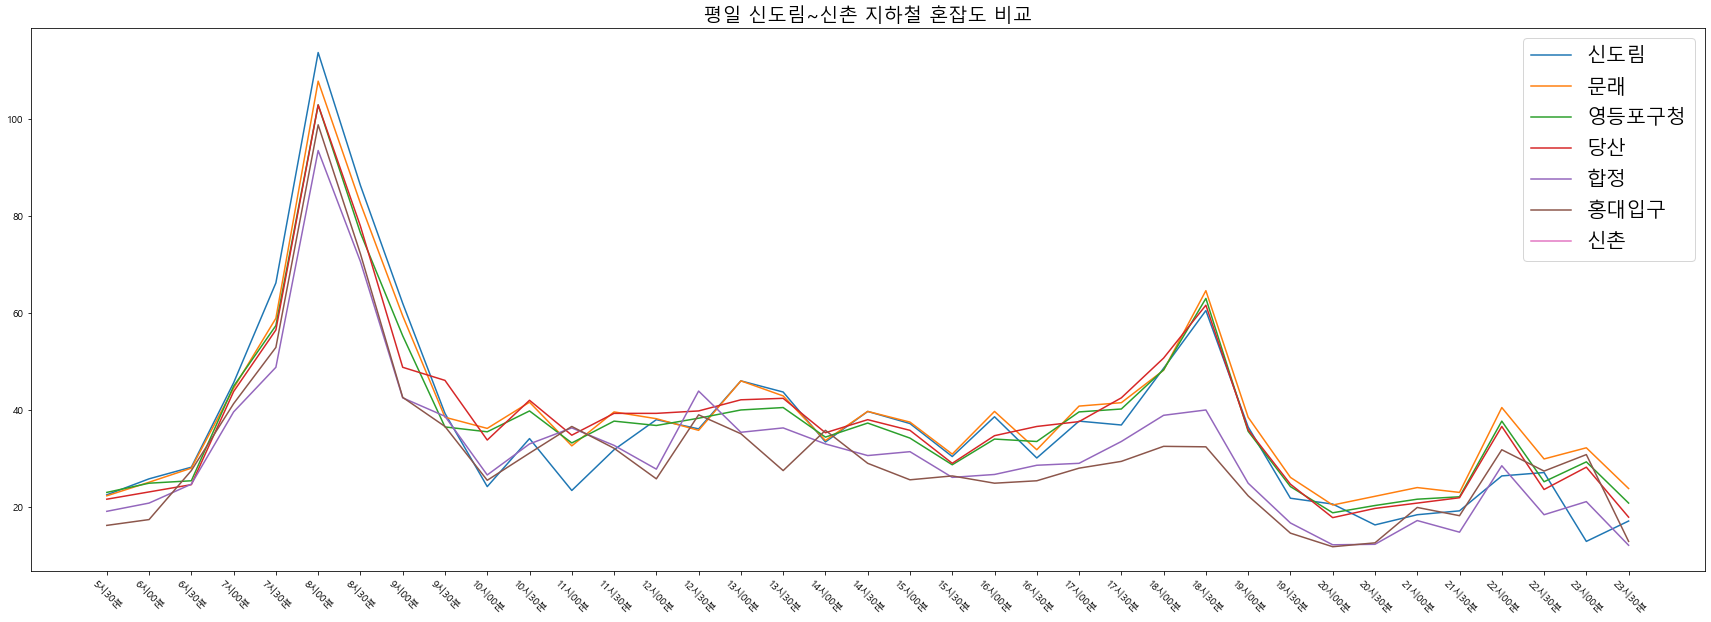

In [8]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
font_path = './malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path,).get_name()
rc('font', family=font_name)
fig = plt.figure(figsize=(30,10))

for label in station:
    a = df.columns[5:]
    b = df[(df['역명']==label) & (df['구분']=='내선')&(df['조사일자']=='평일')].iloc[:,5:].max()
    sns.lineplot(x=a, y=b, label=label)
    plt.legend(loc='best', prop={'size':20})
sns.set(font_scale=1.6)
plt.xticks(rotation=-45)
plt.title('평일 신도림~신촌 지하철 혼잡도 비교')
plt.show()

#### 주제 1 도출
- 8시 전으로는 빨리 가는 것이 편하게 가는 것이다.
- 조금 늦게 간다면 오전 10시쯤 가는 것이 좋다.
- 퇴근은 16시30분 이후로 점점 붐비기 시작하며 18시 30분에 최고조에 이른다. 그리고 점차 20시까지 줄어드는 추세이다.
- 22시 전후로 잠시 높아졌다가 다시 낮아진다.

### 주제 2 평일, 토요일, 일요일별로 서울시 전체 지하철의 혼잡도 조사
서울시 지하철 전체를 봤을 때는 어떠한 경향이 나타나는지 궁금해서 조사

In [9]:
table = df.copy() # 복사본으로 목적에 맞게 자를 계획

In [10]:
table= table.drop(['역번호','역명', '구분'], axis=1)

In [11]:
table.head()

,조사일자,호선,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
연번,,,,,,,,,,,,,,,,,,,,,
1,평일,1,6.2,14.6,13.4,26.8,43.3,53.6,70.9,40.4,...,20.0,15.1,11.1,12.0,12.5,10.1,10.4,16.4,7.8,6.1
2,평일,1,9.1,8.6,9.3,15.2,29.3,27.7,19.0,18.5,...,37.5,26.5,25.5,26.4,26.3,21.1,32.1,20.3,12.6,10.3
3,평일,1,5.4,10.1,13.0,20.8,32.0,40.6,50.9,30.8,...,24.1,17.4,13.7,14.5,15.8,12.1,14.5,18.3,11.7,11.7
4,평일,1,7.0,6.8,10.2,14.5,27.0,24.7,20.0,18.4,...,33.8,22.9,22.0,24.1,23.0,21.0,24.8,18.5,11.8,9.1
5,평일,1,5.2,10.8,9.3,13.6,19.6,25.5,26.5,19.2,...,28.8,20.2,19.1,18.7,22.2,16.1,21.8,25.1,16.3,14.8


In [12]:
table = table.rename(columns={'5시30분':'5:30',
                             '6시00분':'6:00',
                             '6시30분':'6:30',
                             '7시00분':'7:00',
                             '7시30분':'7:30',
                             '8시00분':'8:00',
                             '8시30분':'8:30',
                             '9시00분':'9:00',
                             '9시30분':'9:30',
                             '10시00분':'10:00',
                             '10시30분':'10:30',
                             '11시00분':'11:00',
                             '11시30분':'11:30',
                             '12시00분':'12:00',
                             '12시30분':'12:30',
                             '13시00분':'13:00',
                             '13시30분':'13:30',
                             '14시00분':'14:00',
                             '14시30분':'14:30',
                             '15시00분':'15:00',
                             '15시30분':'15:30',
                             '16시00분':'16:00',
                             '16시30분':'16:30',
                             '17시00분':'17:00',
                             '17시30분':'17:30',
                             '18시00분':'18:00',
                             '18시30분':'18:30',
                             '19시00분':'19:00',
                             '19시30분':'19:30',
                             '20시00분':'20:00',
                             '20시30분':'20:30',
                             '21시00분':'21:00',
                             '21시30분':'21:30',
                             '22시00분':'22:00',
                             '22시30분':'22:30',
                             '23시00분':'23:00',
                             '23시30분':'23:30'
                             })

In [13]:
table.head(1)

,조사일자,호선,5:30,6:00,6:30,7:00,7:30,8:00,8:30,9:00,...,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30
연번,,,,,,,,,,,,,,,,,,,,,
1,평일,1,6.2,14.6,13.4,26.8,43.3,53.6,70.9,40.4,...,20.0,15.1,11.1,12.0,12.5,10.1,10.4,16.4,7.8,6.1


<function matplotlib.pyplot.show(close=None, block=None)>

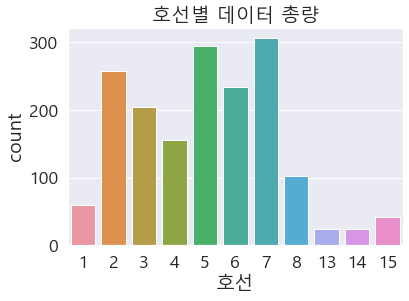

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = './malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path,).get_name()
rc('font', family=font_name)

sns.countplot(x='호선', data=table)
plt.title('호선별 데이터 총량')
plt.show

In [15]:
table['호선'].value_counts()

7     306
5     294
2     258
6     234
3     204
4     156
8     102
1      60
15     42
14     24
13     24
Name: 호선, dtype: int64

서울 지하철은 9호선까지 있고 9호선은 역의 개수가 적어 들어가지 않았는데  
13호선, 14호선, 15선은 무엇인지 찾아봐야한다.

In [16]:
df[(df['호선']==15)].head()

,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
연번,,,,,,,,,,,,,,,,,,,,,
331,평일,15,2555,둔촌동,상선,14.9,16.8,27.4,33.2,46.1,...,46.7,30.1,29.5,25.2,26.8,21.7,28.7,32.0,27.4,14.0
332,평일,15,2555,둔촌동,하선,10.5,17.8,17.4,22.4,38.1,...,30.5,32.0,25.4,21.9,24.7,26.9,24.8,23.3,15.8,13.2
333,평일,15,2556,올림픽공원(한국체대),상선,13.0,18.8,25.7,30.8,41.7,...,47.4,32.0,28.9,26.0,25.7,21.1,28.2,32.8,27.1,14.5
334,평일,15,2556,올림픽공원(한국체대),하선,9.0,12.3,15.8,20.9,29.5,...,32.5,33.5,26.0,23.9,25.7,28.0,25.8,28.0,17.0,12.7
335,평일,15,2557,방이,상선,15.1,18.3,27.9,31.5,45.1,...,43.8,26.9,22.8,24.4,22.6,18.2,23.7,24.7,19.9,12.3


In [17]:
df[(df['호선']==14)].head()

,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
연번,,,,,,,,,,,,,,,,,,,,,
113,평일,14,247,도림천,내선,6.3,14.3,15.8,14.7,20.6,...,69.7,45.4,31.7,26.3,29.1,25.0,25.3,30.8,24.1,17.9
114,평일,14,247,도림천,외선,23.9,26.6,41.2,51.9,85.3,...,18.4,12.6,11.6,10.5,10.4,8.8,10.3,8.3,6.6,4.2
115,평일,14,248,양천구청,내선,7.1,15.0,16.4,15.2,20.6,...,53.1,34.9,24.4,20.4,21.9,18.4,18.4,25.2,18.9,16.0
116,평일,14,248,양천구청,외선,24.1,26.4,40.6,51.8,85.5,...,17.8,12.4,11.7,10.6,10.3,9.0,10.4,8.3,6.6,4.3
117,평일,14,249,신정네거리,내선,8.2,15.2,14.6,17.8,22.4,...,29.7,21.4,13.7,12.5,12.9,11.5,10.1,13.1,10.1,9.3


In [18]:
df[df['호선']==13].head()

,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,...,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분
연번,,,,,,,,,,,,,,,,,,,,,
107,평일,13,244,용답,내선,16.3,12.8,17.8,21.4,35.4,...,6.5,5.5,4.1,3.5,4.3,3.1,3.0,2.2,1.4,0.9
108,평일,13,244,용답,외선,2.6,4.4,5.2,5.8,7.7,...,23.5,18.2,16.4,16.0,15.8,12.0,14.0,13.8,9.5,5.6
109,평일,13,245,신답,내선,12.4,10.8,14.9,18.1,30.2,...,6.7,5.4,4.4,3.8,4.7,3.8,3.6,2.7,1.8,1.2
110,평일,13,245,신답,외선,2.6,4.5,4.7,6.4,8.2,...,22.0,15.4,14.2,12.3,12.9,10.3,11.7,10.9,9.1,4.4
111,평일,13,246,신설동,내선,7.5,8.9,11.0,12.5,22.3,...,6.4,5.3,4.1,3.7,4.2,3.3,3.9,2.8,1.9,1.3


In [19]:
from IPython.display import Image 

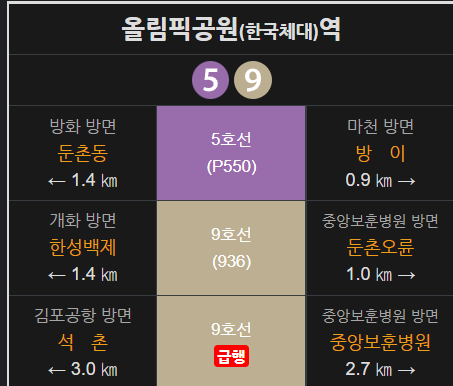

In [20]:
Image("image/15_line.png")

In [21]:
table['호선'].replace(15,5, inplace=True)
table['호선'].replace(14,2, inplace=True)
table['호선'].replace(13,2, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

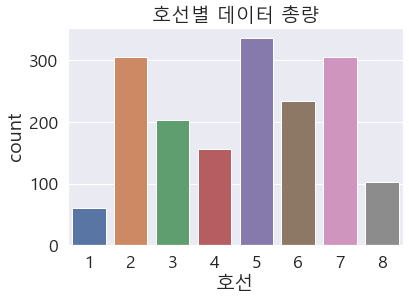

In [22]:
sns.countplot(x='호선', data=table)
plt.title('호선별 데이터 총량')
plt.show

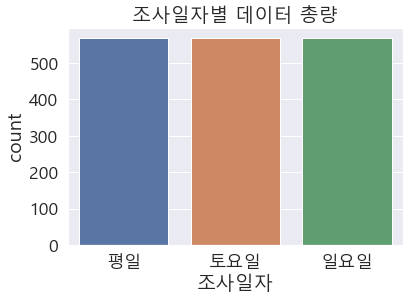

In [23]:
sns.countplot(x='조사일자', data=table)
plt.title('조사일자별 데이터 총량')
plt.show()

In [24]:
table.head(1)

,조사일자,호선,5:30,6:00,6:30,7:00,7:30,8:00,8:30,9:00,...,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30
연번,,,,,,,,,,,,,,,,,,,,,
1,평일,1,6.2,14.6,13.4,26.8,43.3,53.6,70.9,40.4,...,20.0,15.1,11.1,12.0,12.5,10.1,10.4,16.4,7.8,6.1


### 조사 일자별 지하철 평균 승차 밀도

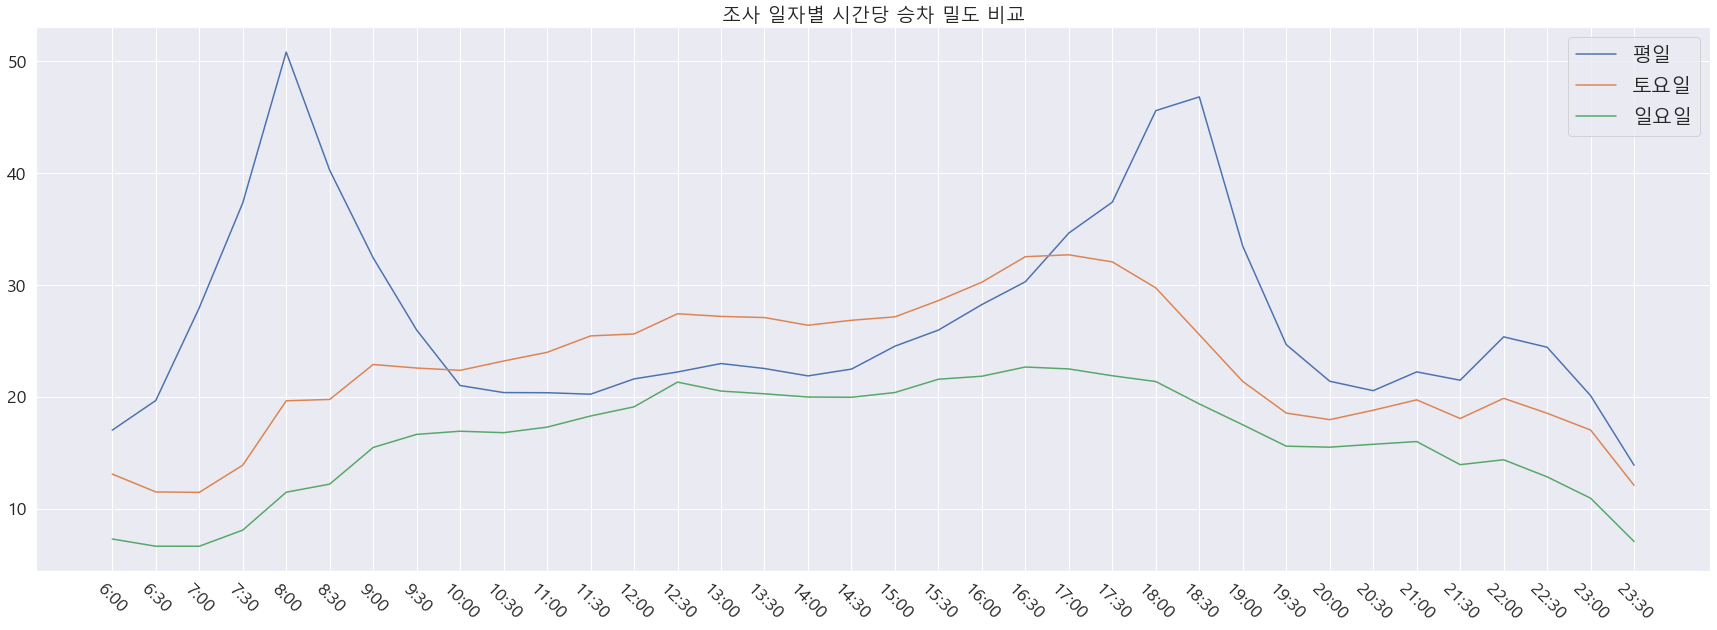

In [25]:
from matplotlib import font_manager, rc
font_path = './malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path,).get_name()
rc('font', family=font_name)
labels = list(set(table['조사일자']))
fig = plt.figure(figsize=(30,10))
for label in labels:
    x = table.columns[3:]
    y = table[table['조사일자']==label].mean()[2:]
    sns.lineplot(x=x, y=y, label=label)
    plt.legend(loc='best', prop={'size':20})
sns.set(font_scale=1.6)
plt.xticks(rotation=-45)
plt.title('조사 일자별 시간당 승차 밀도 비교')
plt.show()

### 지하철 호선별 시간당 승차 밀도 비교

#### 평일

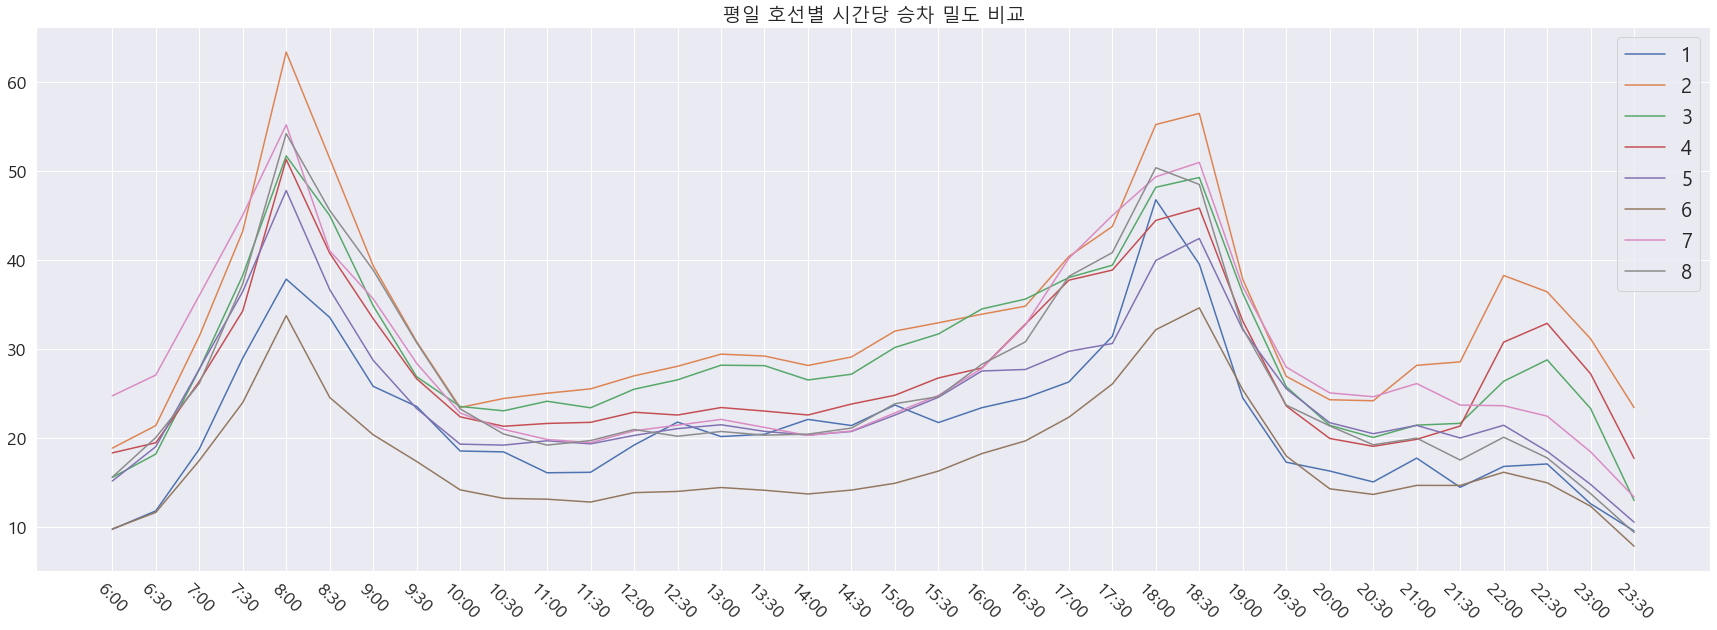

In [26]:
from matplotlib import font_manager, rc
font_path = './malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path,).get_name()
rc('font', family=font_name)
labels = list(set(table['호선']))
fig = plt.figure(figsize=(30,10))
for label in labels:
    x = table.columns[3:]
    y = table[(table['호선']==label)&(table['조사일자']=='평일')].mean()[2:]
    sns.lineplot(x=x, y=y, label=label)
    plt.legend(loc='best', prop={'size':20})
sns.set(font_scale=1.6)
plt.xticks(rotation=-45)
plt.title('평일 호선별 시간당 승차 밀도 비교')
plt.show()

#### 토요일

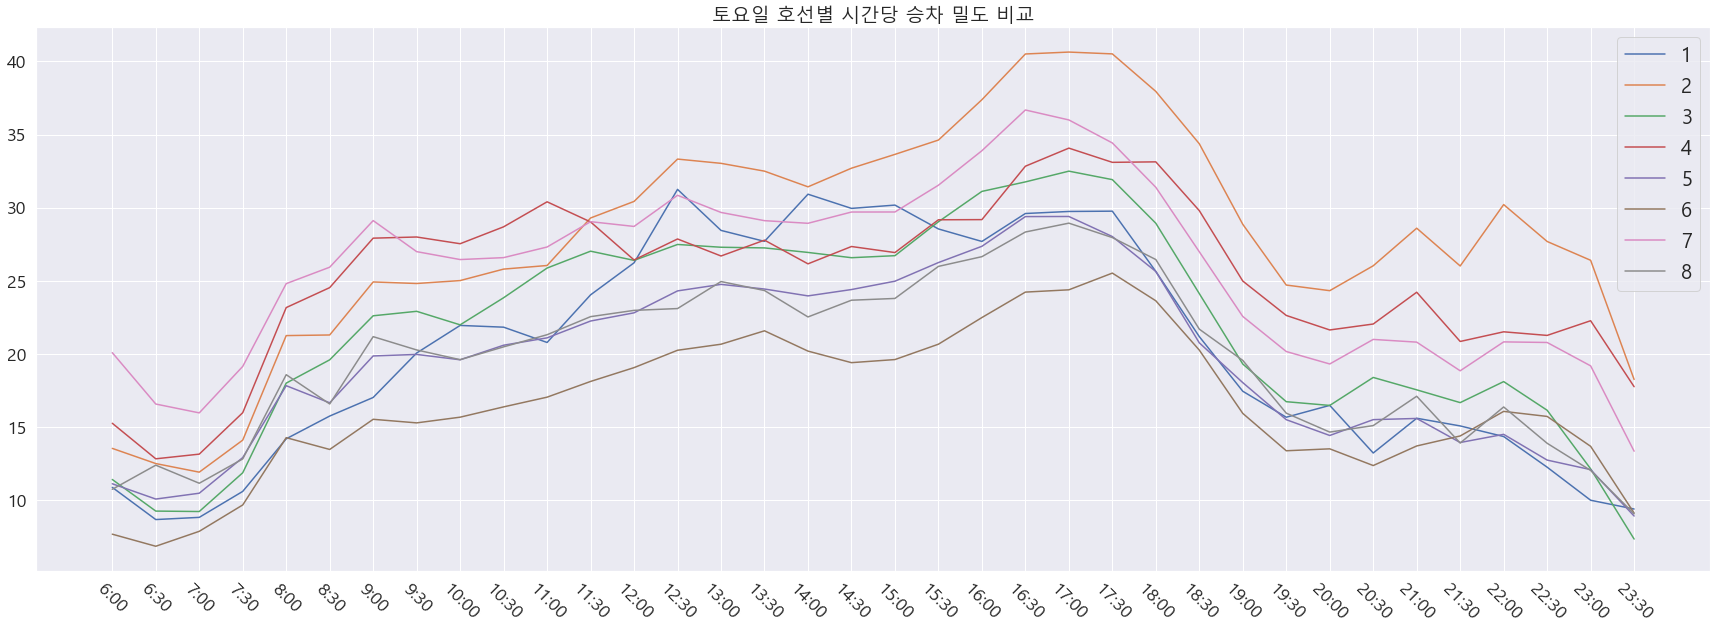

In [27]:
from matplotlib import font_manager, rc
font_path = './malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path,).get_name()
rc('font', family=font_name)
labels = list(set(table['호선']))
fig = plt.figure(figsize=(30,10))
for label in labels:
    x = table.columns[3:]
    y = table[(table['호선']==label)&(table['조사일자']=='토요일')].mean()[2:]
    sns.lineplot(x=x, y=y, label=label)
    plt.legend(loc='best', prop={'size':20})
sns.set(font_scale=1.6)
plt.xticks(rotation=-45)
plt.title('토요일 호선별 시간당 승차 밀도 비교')
plt.show()

#### 일요일

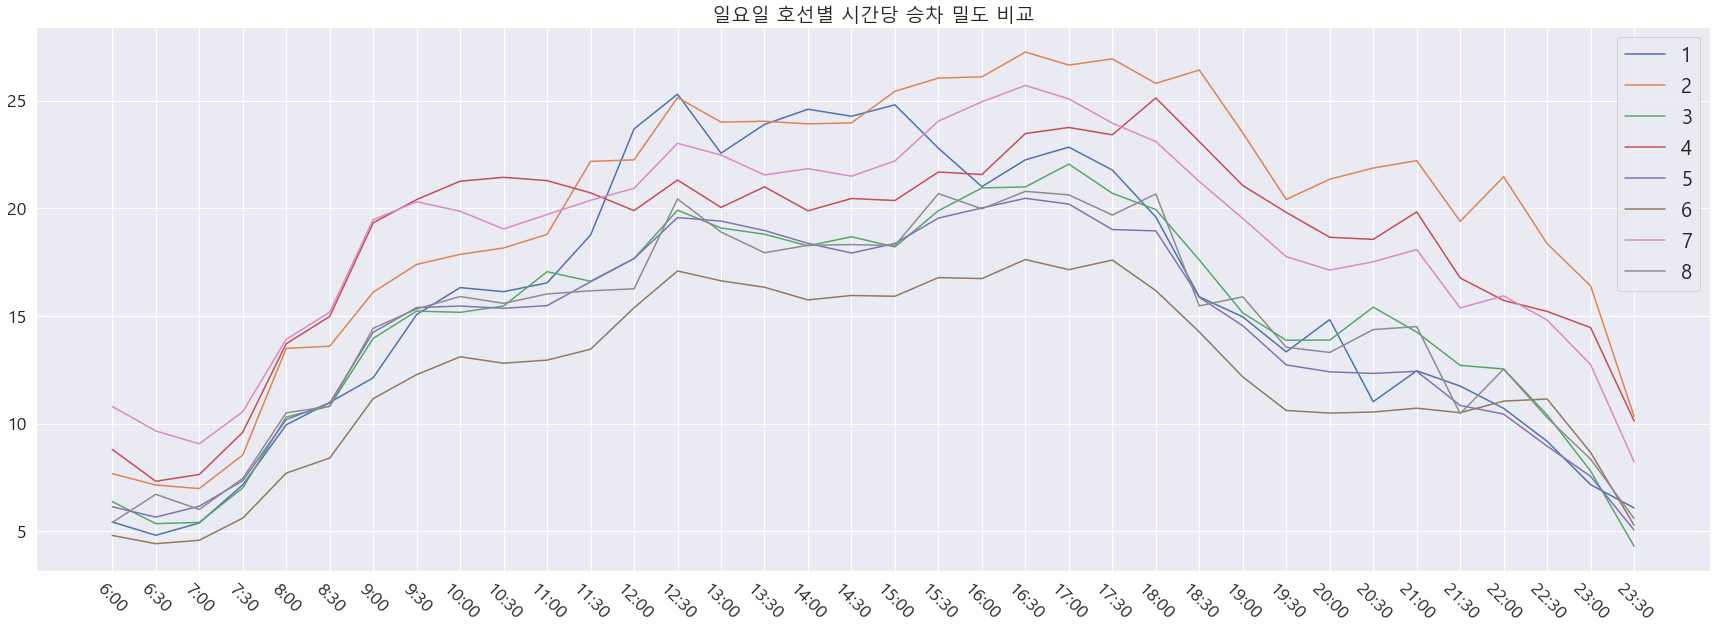

In [28]:
from matplotlib import font_manager, rc
font_path = './malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path,).get_name()
rc('font', family=font_name)
labels = list(set(table['호선']))
fig = plt.figure(figsize=(30,10))
for label in labels:
    x = table.columns[3:]
    y = table[(table['호선']==label)&(table['조사일자']=='일요일')].mean()[2:]
    sns.lineplot(x=x, y=y, label=label)
    plt.legend(loc='best', prop={'size':20})
plt.xticks(rotation=-45)
sns.set(font_scale=1.6)
plt.title('일요일 호선별 시간당 승차 밀도 비교')
plt.show()

#### 주제2 결론
- 평일 출근시간(08:00 전후) 퇴근시간(19:30 전후)는 지옥철이다.
- 낮 시간대는 토요일이 가장 승차 밀도가 높다.
- 일요일에는 지하철 이용빈도가 낮다.
- 전반적으로 2호선의 이용비율은 매시간 가장 높은 편이다.
- 주제 1과 비교했을 때 내가 다니는 노선(신도림~신촌)밀도는 2호선 평균보다 훨씬 혼잡한 지역에 속한다.